<IPython.core.display.Javascript object>


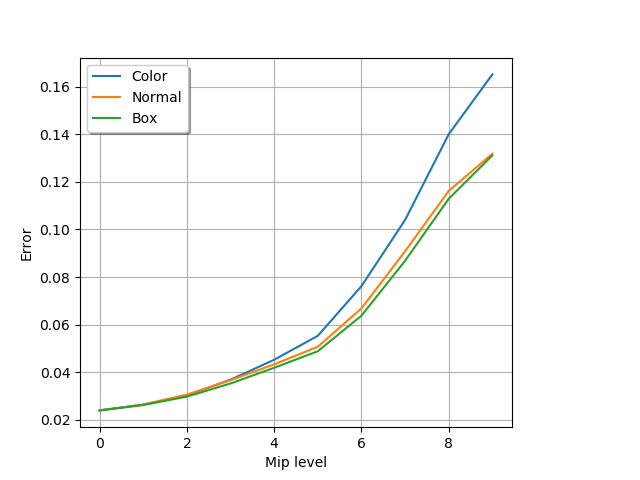

Dropdown(description='Task:', options=('BlastBot', 'blastBotFlipped', 'Browser', 'BrowserFlipped', 'BrowserVie…

Dropdown(description='Task:', options=('backLPIPsResult.csv', 'backSSIMResult.csv', 'bottomLPIPsResult.csv', '…

Checkbox(value=True, description='Color: ')

Checkbox(value=False, description='Normal: ')

Checkbox(value=False, description='Box: ')

In [3]:
%matplotlib notebook
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import csv
from os import walk
from numpy import genfromtxt

fileName = "backSSIMResult.csv"
csvMainFolderPath = "C:/Users/Cortana/Desktop/UniZeug/masterThesis/Results/csvFiles/"
csvCurrentFolderPath = "C:/Users/Cortana/Desktop/UniZeug/masterThesis/Results/csvFiles/BrowserViewDepFlipped/"

fig, ax = plt.subplots()
csvResults = []
lines = []
checkboxState = [True, False, False]

def repaintPlt(filePath):
    csvResults = genfromtxt(filePath, delimiter=',')
    
    if "LPIPs" in filePath:
        for (i,j), value in np.ndenumerate(csvResults):
                csvResults[i,j] = 1 - csvResults[i,j]
    
    plt.cla()
    for i in range(0,3):
        ax.plot(csvResults[i,:])
    
    ax.legend(['Color', 'Normal', 'Box'],
                loc='upper left', fancybox=True, shadow=True)
    
    ax.set_ylabel('Error')
    ax.set_xlabel('Mip level')
    
    legend = ax.get_legend()
    lines.clear()
    for artist in legend.axes.get_children():
        lines.append(artist)
    lines[0].set_visible(checkboxState[0])
    lines[1].set_visible(checkboxState[1])
    lines[2].set_visible(checkboxState[2])
    plt.grid()
    plt.show()

repaintPlt(csvCurrentFolderPath + fileName)
fig.subplots_adjust(right=0.8)



files = []
for (dirpath, dirnames, filenames) in walk(csvCurrentFolderPath):
    files.extend(filenames)
    break
filesWidget = widgets.Dropdown(
    options=files,
    description='Task:',
)

folders = []
for (dirpath, dirnames, filenames) in walk(csvMainFolderPath):
    folders.extend(dirnames)
    break
foldersWidget = widgets.Dropdown(
    options=folders,
    description='Task:',
)

def setFilesWidget():
    global csvCurrentFolderPath
    csvCurrentFolderPath = csvMainFolderPath + foldersWidget.value + "/"
    files = []
    for (dirpath, dirnames, filenames) in walk(csvCurrentFolderPath):
        files.extend(filenames)
        break
    filesWidget.options = files
    filesWidget.value = files[0]
    repaintPlt(csvCurrentFolderPath + filesWidget.value)

def folderChanged(change):
    if change['type'] == 'change' and change['name'] == 'value':
        setFilesWidget()

def fileChanged(change):
    if change['type'] == 'change' and change['name'] == 'value':
        repaintPlt(csvCurrentFolderPath + change['new'])

foldersWidget.observe(folderChanged)
display(foldersWidget)
filesWidget.observe(fileChanged)
display(filesWidget)


# checkboxes

def setColorVisible(new_value):
    lines[0].set_visible(new_value['new'])
    checkboxState[0] = new_value['new']
    fig.canvas.draw()
def setNormalVisible(new_value):
    lines[1].set_visible(new_value['new'])
    checkboxState[1] = new_value['new']
    fig.canvas.draw()
def setBoxVisible(new_value):
    lines[2].set_visible(new_value['new'])
    checkboxState[2] = new_value['new']
    fig.canvas.draw()


    
ColorVisible = widgets.Checkbox(description='Color: ')
ColorVisible.observe(setColorVisible, 'value')
ColorVisible.value = True
display(ColorVisible)

normalVisible = widgets.Checkbox(description='Normal: ')
normalVisible.observe(setNormalVisible, 'value')
display(normalVisible)

boxVisible = widgets.Checkbox(description='Box: ')
boxVisible.observe(setBoxVisible, 'value')
display(boxVisible)